In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('../data/sensors-230-pollution.csv')

In [3]:
df

,Time,temperature,humidity,dust_10_0,dust_2_5,no2,co,nh3
0,2019-10-01 00:01:16,17,83,15,8,42.0,8394.0,503.0
1,2019-10-01 00:03:15,18,82,3,3,42.0,8394.0,503.0
2,2019-10-01 00:05:16,17,83,3,3,42.0,8394.0,503.0
3,2019-10-01 00:07:16,17,83,10,10,42.0,8394.0,503.0
4,2019-10-01 00:09:16,17,82,38,23,42.0,9608.0,558.0
...,...,...,...,...,...,...,...,...
126132,2020-04-15 23:51:47,10,41,11,10,NaN,NaN,NaN
126133,2020-04-15 23:53:48,10,42,11,8,NaN,NaN,NaN
126134,2020-04-15 23:55:49,11,40,11,8,NaN,NaN,NaN
126135,2020-04-15 23:57:51,11,41,11,9,NaN,NaN,NaN


In [4]:
df.dtypes

Time            object
temperature      int64
humidity         int64
dust_10_0        int64
dust_2_5         int64
no2            float64
co             float64
nh3            float64
dtype: object

In [5]:
missing_data = df.isna().sum()

print("Missing Data Counts:")
print(missing_data)

Missing Data Counts:
Time              0
temperature       0
humidity          0
dust_10_0         0
dust_2_5          0
no2             384
co              388
nh3            3483
dtype: int64


In [6]:
total_data_points = df.count().sum()
print("Total Data Points:", total_data_points)

Total Data Points: 1004841


/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/mykyta/min

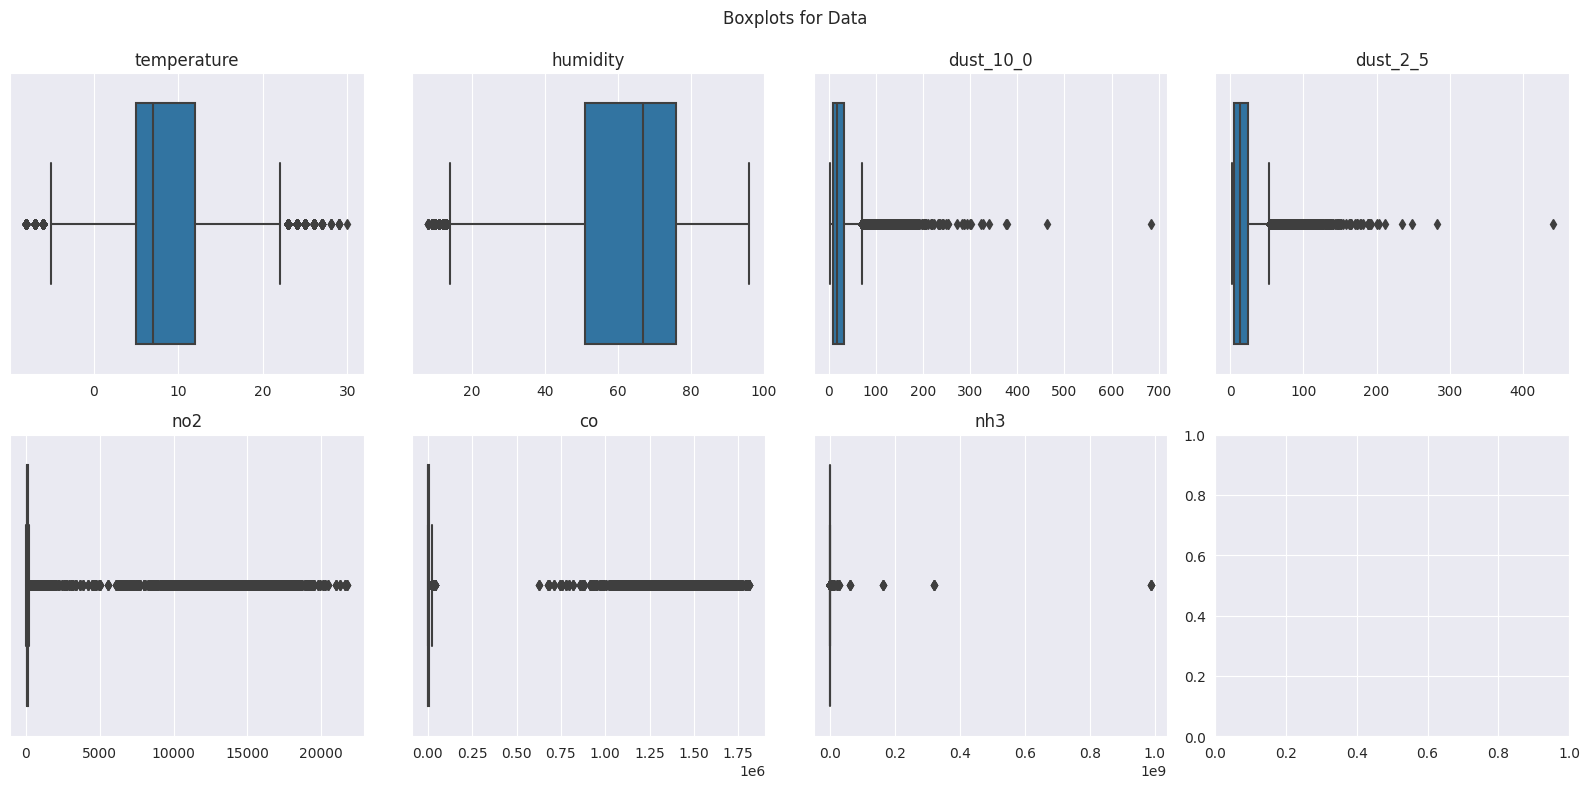

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Boxplots for Data')

columns = ['temperature', 'humidity', 'dust_10_0', 'dust_2_5', 'no2', 'co', 'nh3']

for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=df[col], ax=ax, orient='vertical')
    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

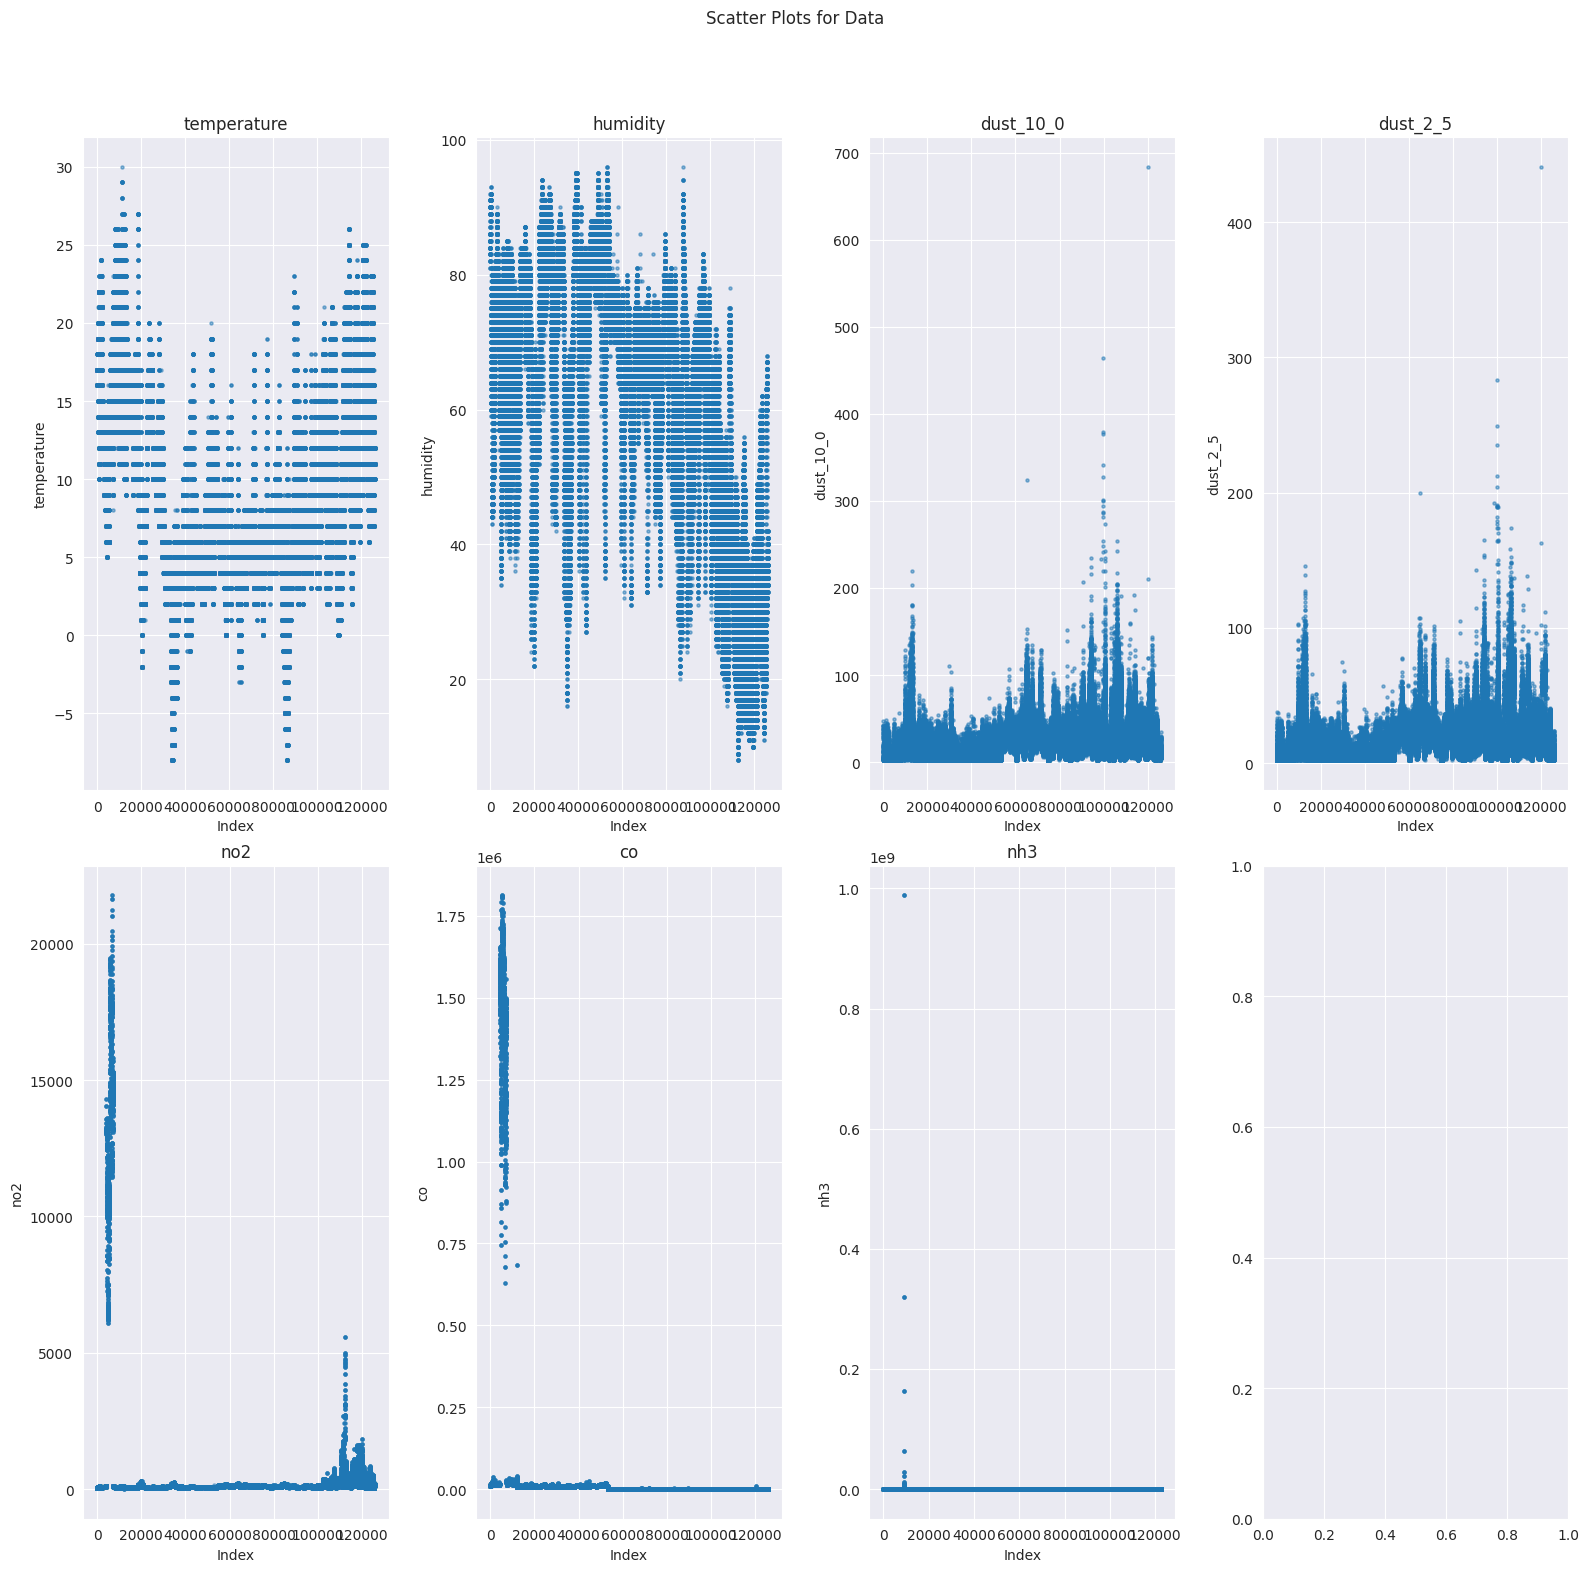

In [8]:
columns = ['temperature', 'humidity', 'dust_10_0', 'dust_2_5', 'no2', 'co', 'nh3']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 16))
fig.suptitle('Scatter Plots for Data')

# Loop through the columns and create scatter plots
for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]  # Get the subplot
    ax.scatter(df.index, df[col], s=5, alpha=0.5)
    ax.set_title(col)
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [9]:
df = df.loc[~(df['dust_10_0'] >= 200)]
df = df.loc[~(df['dust_2_5'] >= 100)]
df = df.loc[~(df['no2'] >= 200)]
df = df.loc[~(df['co'] >= 1000)]
df = df.loc[~(df['nh3'] >= 200)]

In [10]:
df

,Time,temperature,humidity,dust_10_0,dust_2_5,no2,co,nh3
53120,2019-12-21 22:19:06,6,94,15,9,53.0,542.0,40.0
53121,2019-12-21 22:21:06,6,95,38,21,53.0,542.0,40.0
53122,2019-12-21 22:23:06,6,95,28,12,53.0,542.0,40.0
53123,2019-12-21 22:25:06,6,93,14,8,140.0,633.0,41.0
53124,2019-12-21 22:27:06,6,94,18,12,42.0,633.0,41.0
...,...,...,...,...,...,...,...,...
126132,2020-04-15 23:51:47,10,41,11,10,NaN,NaN,NaN
126133,2020-04-15 23:53:48,10,42,11,8,NaN,NaN,NaN
126134,2020-04-15 23:55:49,11,40,11,8,NaN,NaN,NaN
126135,2020-04-15 23:57:51,11,41,11,9,NaN,NaN,NaN


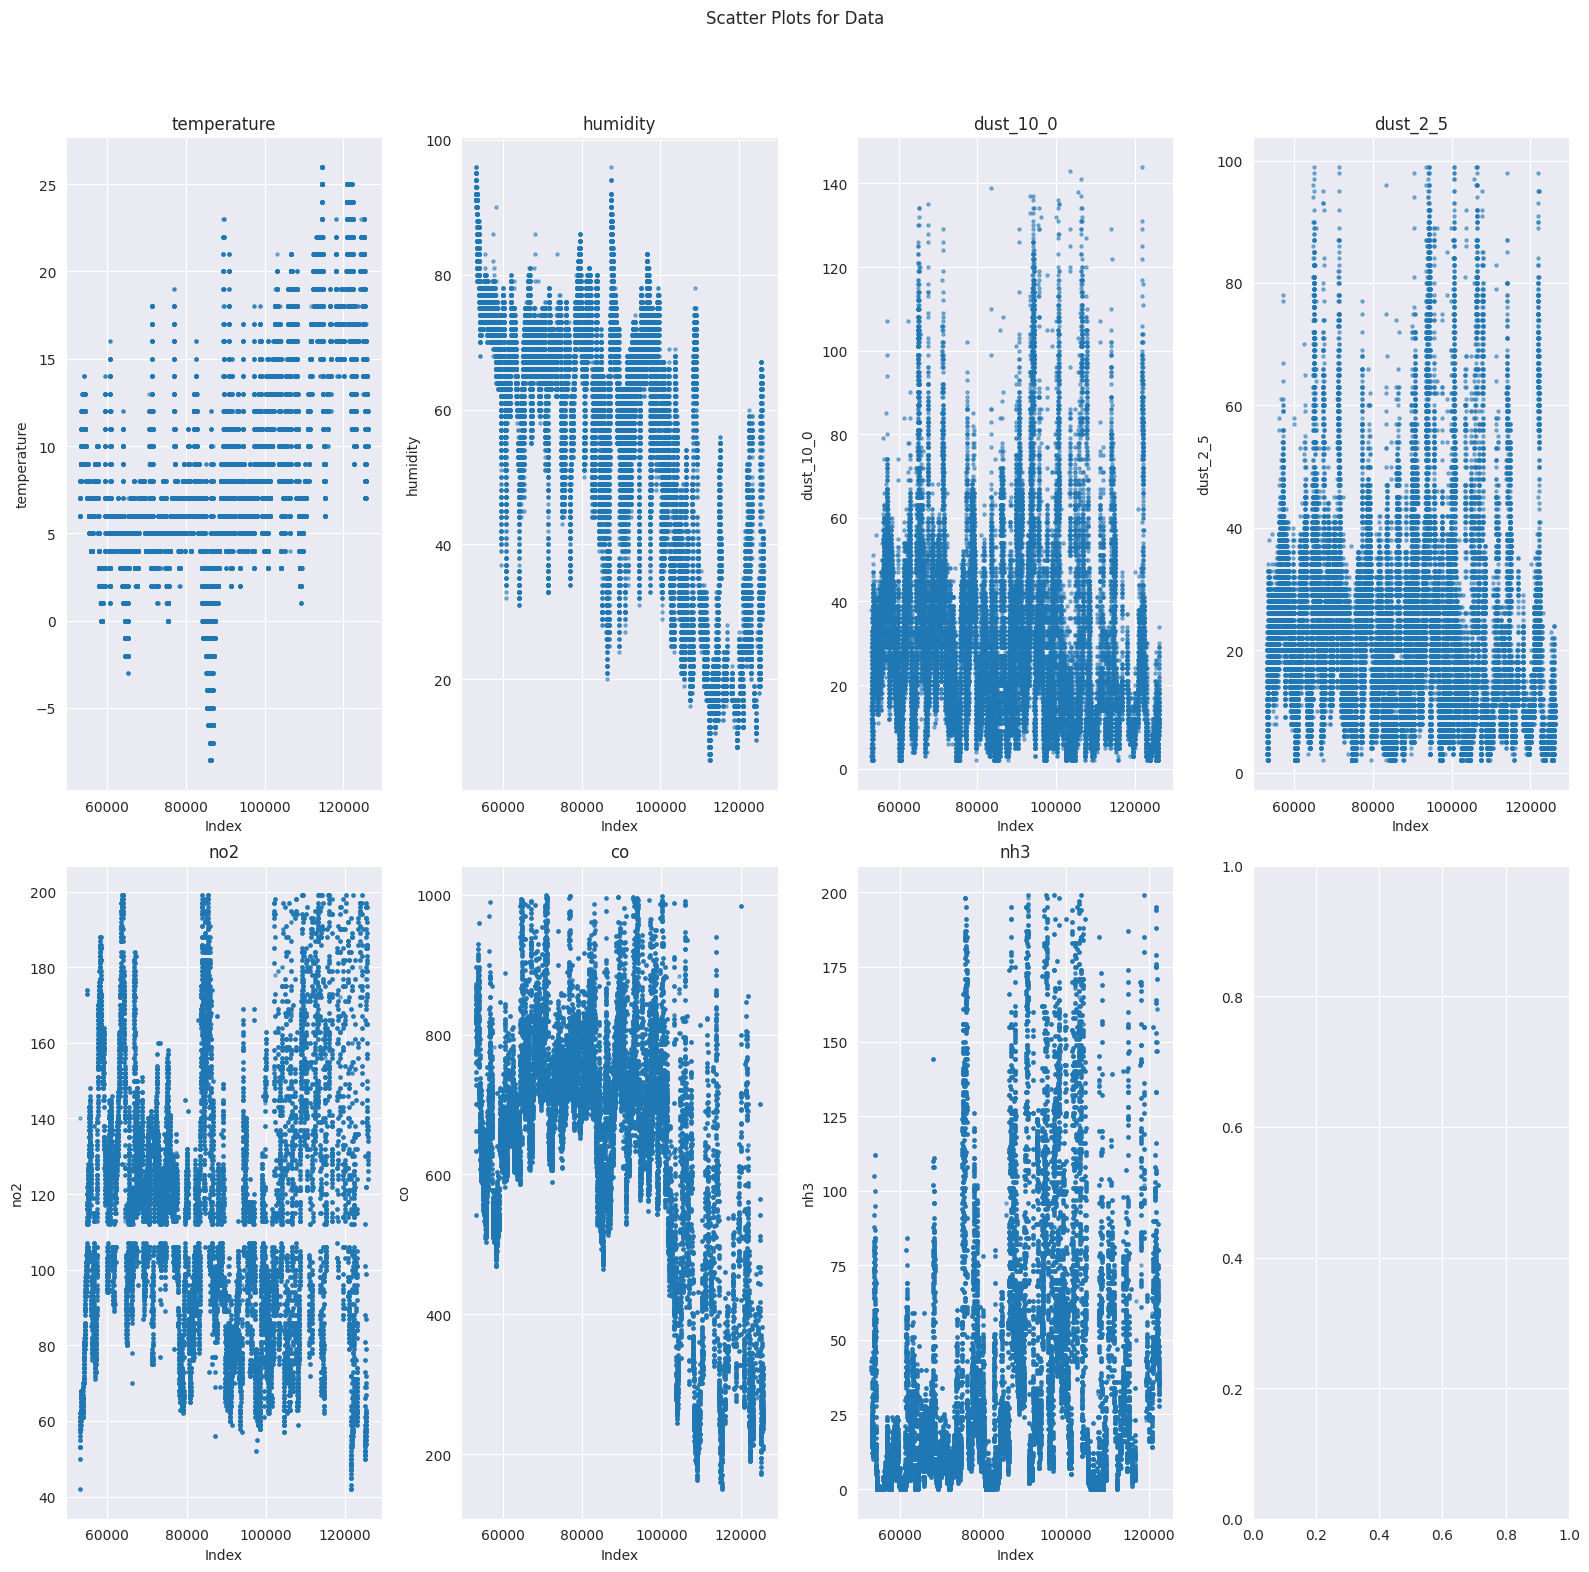

In [11]:
columns = ['temperature', 'humidity', 'dust_10_0', 'dust_2_5', 'no2', 'co', 'nh3']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 16))
fig.suptitle('Scatter Plots for Data')

# Loop through the columns and create scatter plots
for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]  # Get the subplot
    ax.scatter(df.index, df[col], s=5, alpha=0.5)
    ax.set_title(col)
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/mykyta/min

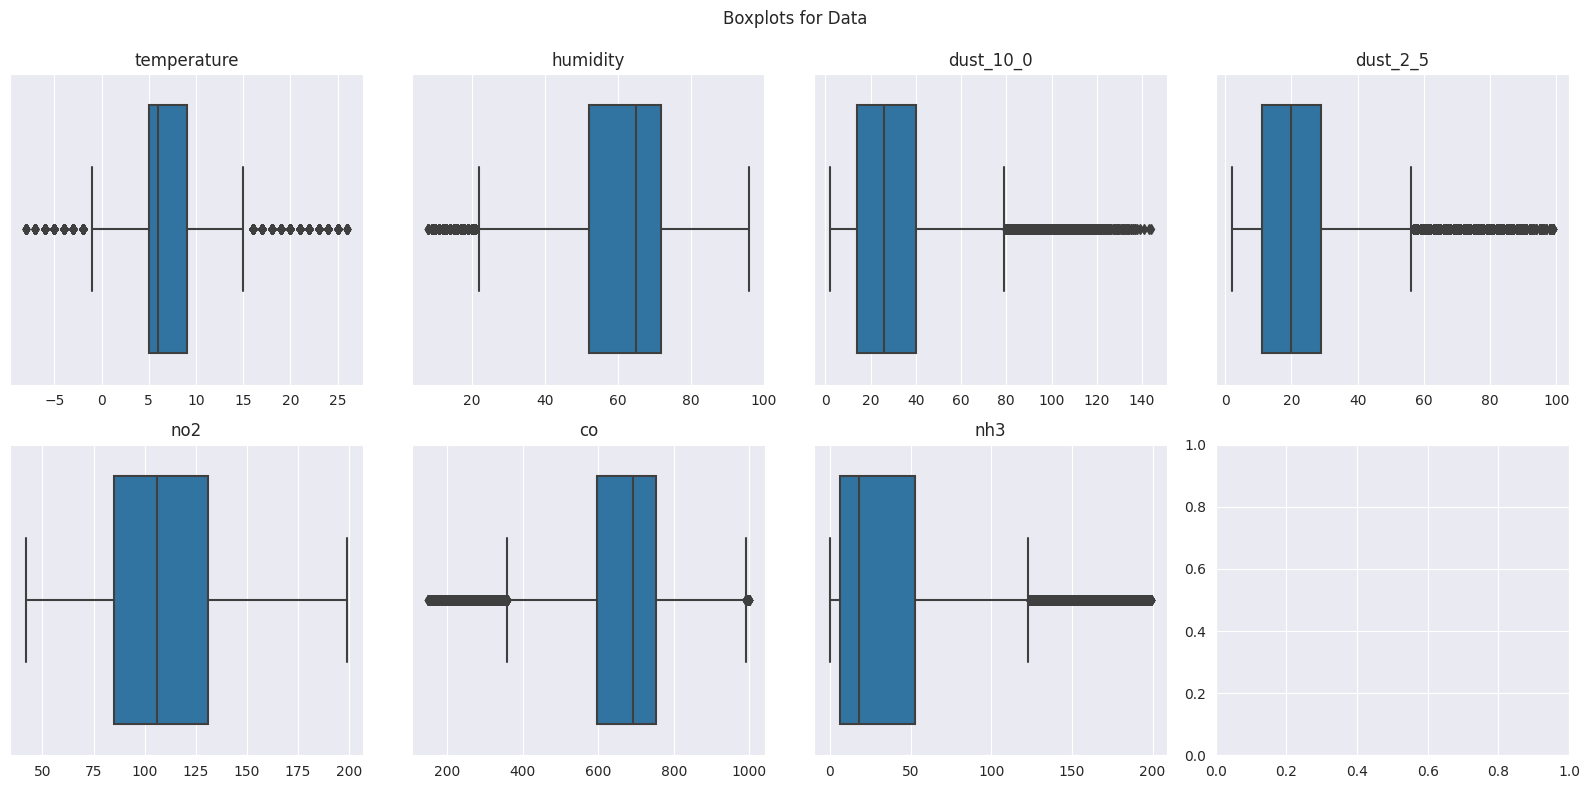

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Boxplots for Data')

columns = ['temperature', 'humidity', 'dust_10_0', 'dust_2_5', 'no2', 'co', 'nh3']

for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=df[col], ax=ax, orient='vertical')
    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [13]:
df_cleaned = df.dropna()

print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
                       Time  temperature  humidity  dust_10_0  dust_2_5  \
53120   2019-12-21 22:19:06            6        94         15         9   
53121   2019-12-21 22:21:06            6        95         38        21   
53122   2019-12-21 22:23:06            6        95         28        12   
53123   2019-12-21 22:25:06            6        93         14         8   
53124   2019-12-21 22:27:06            6        94         18        12   
...                     ...          ...       ...        ...       ...   
122491  2020-04-10 20:15:23           14        57         16        14   
122492  2020-04-10 20:17:25           14        58         13        12   
122493  2020-04-10 20:19:26           15        57         19        17   
122494  2020-04-10 20:21:27           14        58         23        20   
122495  2020-04-10 20:23:32           14        58         16        16   

          no2     co   nh3  
53120    53.0  542.0  40.0  
53121    53.0  542.0  

In [14]:
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'])

/tmp/ipykernel_11601/1542420268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'])


In [15]:
df_cleaned = df_cleaned.set_index(pd.DatetimeIndex(df_cleaned['Time']))

In [16]:
df_cleaned

,Time,temperature,humidity,dust_10_0,dust_2_5,no2,co,nh3
Time,,,,,,,,
2019-12-21 22:19:06,2019-12-21 22:19:06,6,94,15,9,53.0,542.0,40.0
2019-12-21 22:21:06,2019-12-21 22:21:06,6,95,38,21,53.0,542.0,40.0
2019-12-21 22:23:06,2019-12-21 22:23:06,6,95,28,12,53.0,542.0,40.0
2019-12-21 22:25:06,2019-12-21 22:25:06,6,93,14,8,140.0,633.0,41.0
2019-12-21 22:27:06,2019-12-21 22:27:06,6,94,18,12,42.0,633.0,41.0
...,...,...,...,...,...,...,...,...
2020-04-10 20:15:23,2020-04-10 20:15:23,14,57,16,14,177.0,270.0,28.0
2020-04-10 20:17:25,2020-04-10 20:17:25,14,58,13,12,182.0,237.0,28.0
2020-04-10 20:19:26,2020-04-10 20:19:26,15,57,19,17,182.0,237.0,28.0


In [17]:
df_cleaned = df_cleaned.between_time('0:00', '23:59').resample('60T').mean()

In [18]:
df_cleaned = df_cleaned.drop(columns=['Time'])

In [19]:
df_cleaned

,temperature,humidity,dust_10_0,dust_2_5,no2,co,nh3
Time,,,,,,,
2019-12-21 22:00:00,6.052632,94.578947,15.736842,12.000000,55.631579,660.947368,41.842105
2019-12-21 23:00:00,6.600000,93.920000,18.160000,12.400000,57.920000,761.120000,33.760000
2019-12-22 00:00:00,7.000000,93.076923,16.923077,12.961538,60.307692,818.615385,23.846154
2019-12-22 01:00:00,7.892857,91.071429,19.000000,12.785714,59.535714,827.392857,21.071429
2019-12-22 02:00:00,8.000000,90.962963,15.666667,11.962963,61.333333,861.222222,20.481481
...,...,...,...,...,...,...,...
2020-04-10 16:00:00,21.033333,33.900000,30.833333,24.966667,115.566667,230.766667,39.500000
2020-04-10 17:00:00,19.066667,43.666667,16.166667,13.233333,107.433333,309.766667,41.233333
2020-04-10 18:00:00,16.827586,51.310345,18.551724,14.862069,116.586207,266.034483,38.482759


In [20]:
columns_to_impute = ['temperature', 'humidity', 'dust_10_0', 'dust_2_5', 'no2', 'co', 'nh3']

imp = SimpleImputer(strategy='median')
df_cleaned[columns_to_impute] = imp.fit_transform(df_cleaned[columns_to_impute])

<Axes: xlabel='Time'>

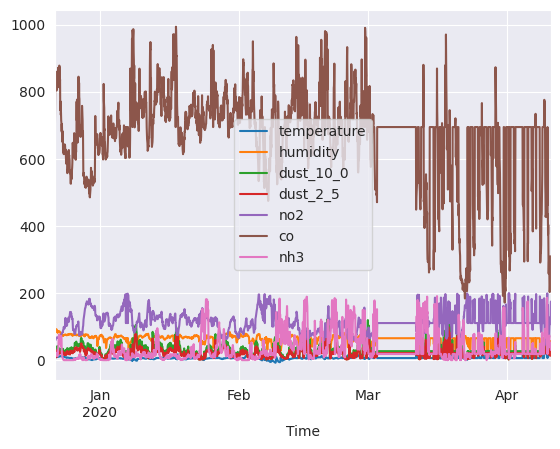

In [21]:
df_cleaned.plot()

In [22]:
def calculate_scaled_aqi(row):
    # Constants for weighting factors and pollutant-specific standards
    weight_temp = 0.05
    weight_humidity = 0.05
    weight_dust_10_0 = 0.1
    weight_dust_2_5 = 0.1
    weight_NO2 = 0.2
    weight_CO = 0.2
    weight_NH3 = 0.1

    # Normalize temperature and humidity between 0 and 1
    normalized_temp = (row['temperature'] - 10) / (40 - 10)
    normalized_humidity = row['humidity'] / 100

    # Calculate sub-indices for each parameter
    sub_index_temp = normalized_temp * 100
    sub_index_humidity = normalized_humidity * 100
    sub_index_dust_10_0 = (row['dust_10_0'] / 150) * 100
    sub_index_dust_2_5 = (row['dust_2_5'] / 75) * 100
    sub_index_NO2 = (row['no2'] / 0.2) * 100
    sub_index_CO = (row['co'] / 10) * 100
    sub_index_NH3 = (row['nh3'] / 0.02) * 100

    # Calculate the overall AQI
    aqi = (
        weight_temp * sub_index_temp +
        weight_humidity * sub_index_humidity +
        weight_dust_10_0 * sub_index_dust_10_0 +
        weight_dust_2_5 * sub_index_dust_2_5 +
        weight_NO2 * sub_index_NO2 +
        weight_CO * sub_index_CO +
        weight_NH3 * sub_index_NH3
    ) / (weight_temp + weight_humidity + weight_dust_10_0 + weight_dust_2_5 + weight_NO2 + weight_CO + weight_NH3)

    # Scale the AQI to a range of 0-500
    scaled_aqi = (aqi / 700) * 500

    return scaled_aqi

In [23]:
df_cleaned['AQI'] = (df_cleaned.apply(calculate_scaled_aqi, axis=1))

In [24]:
df_cleaned

,temperature,humidity,dust_10_0,dust_2_5,no2,co,nh3,AQI
Time,,,,,,,,
2019-12-21 22:00:00,6.052632,94.578947,15.736842,12.000000,55.631579,660.947368,41.842105,24832.879856
2019-12-21 23:00:00,6.600000,93.920000,18.160000,12.400000,57.920000,761.120000,33.760000,21608.244048
2019-12-22 00:00:00,7.000000,93.076923,16.923077,12.961538,60.307692,818.615385,23.846154,17498.292125
2019-12-22 01:00:00,7.892857,91.071429,19.000000,12.785714,59.535714,827.392857,21.071429,16206.468963
2019-12-22 02:00:00,8.000000,90.962963,15.666667,11.962963,61.333333,861.222222,20.481481,16163.725750
...,...,...,...,...,...,...,...,...
2020-04-10 16:00:00,21.033333,33.900000,30.833333,24.966667,115.566667,230.766667,39.500000,28372.427083
2020-04-10 17:00:00,19.066667,43.666667,16.166667,13.233333,107.433333,309.766667,41.233333,28558.991071
2020-04-10 18:00:00,16.827586,51.310345,18.551724,14.862069,116.586207,266.034483,38.482759,28070.527504
